In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn.functional as F

- 0 5_o_Clock_Shadow
- 1 Arched_Eyebrows
- 2 Attractive
- 3 Bags_Under_Eyes
- 4 Bald
- 5 Bangs
- 6 Big_Lips
- 7 Big_Nose
- 8 Black_Hair
- 9 Blond_Hair
- 10 Blurry
- 11 Brown_Hair
- 12 Bushy_Eyebrows
- 13 Chubby
- 14 Double_Chin
- 15 Eyeglasses
- 16 Goatee
- 17 Gray_Hair
- 18 Heavy_Makeup
- 19 High_Cheekbones
- 20 Male
- 21 Mouth_Slightly_Open
- 22 Mustache
- 23 Narrow_Eyes
- 24 No_Beard
- 25 Oval_Face
- 26 Pale_Skin
- 27 Pointy_Nose
- 28 Receding_Hairline
- 29 Rosy_Cheeks
- 30 Sideburns
- 31 Smiling
- 32 Straight_Hair
- 33 Wavy_Hair
- 34 Wearing_Earrings
- 35 Wearing_Hat
- 36 Wearing_Lipstick
- 37 Wearing_Necklace
- 38 Wearing_Necktie
- 39 Young

In [2]:
def show_image(image):
    plt.imshow(image.squeeze(0).permute(1, 2, 0).detach().cpu())
    plt.show()

In [3]:
model = torch.load('model.ckpt')
flow = torch.load('flow.pkt')

/opt/conda/lib/python3.6/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/opt/conda/lib/python3.6/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/opt/conda/lib/python3.6/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute o

In [4]:
z_train = pd.read_csv('data/z_train.csv')
y_train = pd.read_csv('data/y_train.csv')

In [5]:
z = torch.tensor(z_train.values, dtype=torch.float).cuda()
y = torch.tensor(y_train.values, dtype=torch.float).cuda()

In [6]:
res = model.decode(z[0])

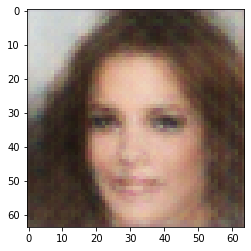

In [7]:
show_image((res + 1) / 2)

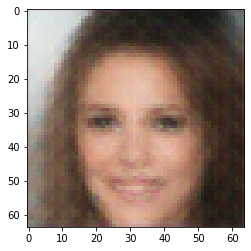

In [8]:
z_sampled = flow.sample(1, y[0].unsqueeze(0))
res_sampled = model.decode(z_sampled)
show_image((res_sampled + 1) / 2)

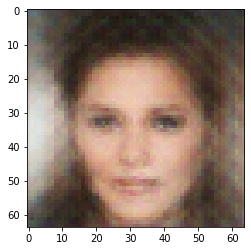

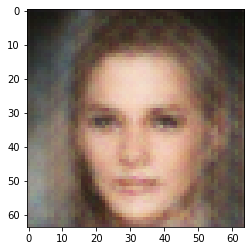

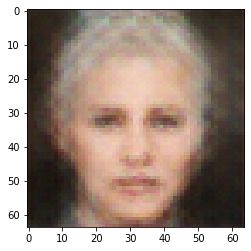

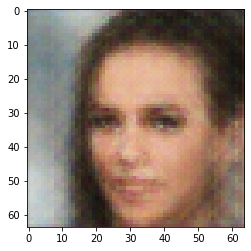

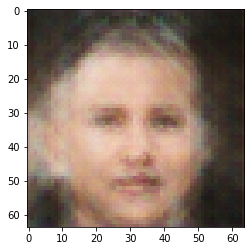

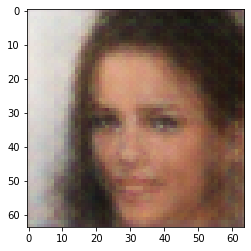

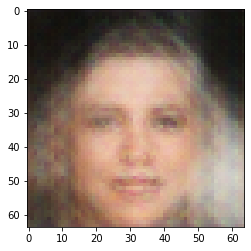

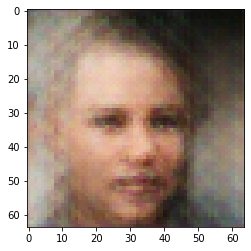

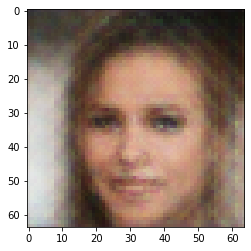

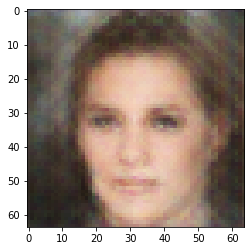

In [10]:
for _ in range(10):
    context = F.one_hot(torch.tensor([20]), 40).float()
    context = context.to('cuda:0')

    z_sampled = flow.sample(1, context)
    res_sampled = model.decode(z_sampled)
    show_image((res_sampled + 1) / 2)